In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [4]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf['single_function']['training_params']['kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['training_params']['kwargs']['data_dir'],
     default_conf['single_function']['training_params']['kwargs']['extension'],
    default_conf['single_function']['training_params']['kwargs']['data_file'])

## Generating data on the fly from a simple function.

In [6]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 32.922828674316406
 Validation loss after 0 equals                     64.2792739868164


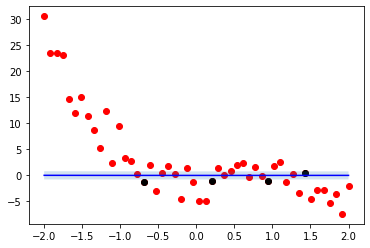

  1%|          | 97/10000 [00:00<09:04, 18.18it/s]

Mean loss at epoch 100 : 2.8036866188049316
 Validation loss after 100 equals                     3.127296209335327


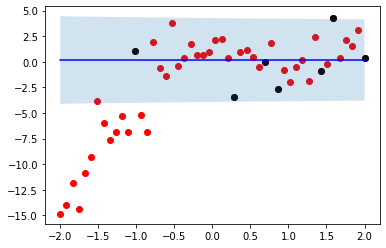

  2%|▏         | 197/10000 [00:01<02:19, 70.32it/s]

Mean loss at epoch 200 : 3.4493649005889893
 Validation loss after 200 equals                     3.583587884902954


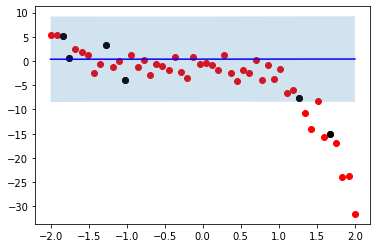

  3%|▎         | 299/10000 [00:02<01:18, 123.46it/s]

Mean loss at epoch 300 : 3.7251977920532227
 Validation loss after 300 equals                     2.738675594329834


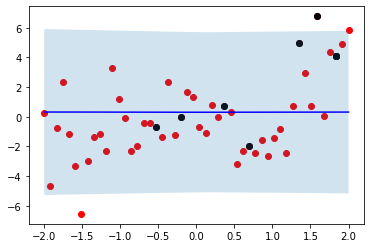

  4%|▍         | 390/10000 [00:03<01:06, 145.08it/s]

Mean loss at epoch 400 : 2.75665283203125
 Validation loss after 400 equals                     3.9303884506225586


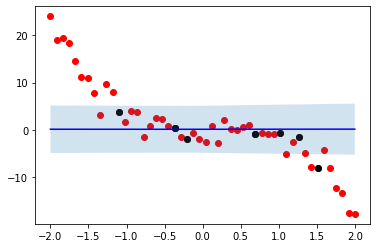

  5%|▍         | 498/10000 [00:03<00:54, 175.46it/s]

Mean loss at epoch 500 : 3.123412847518921
 Validation loss after 500 equals                     3.3136696815490723


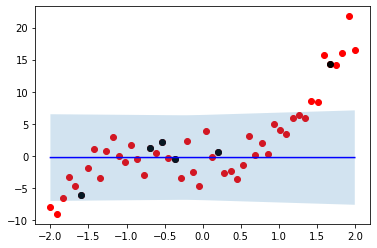

  6%|▌         | 581/10000 [00:04<01:01, 153.38it/s]

Mean loss at epoch 600 : 3.181008815765381
 Validation loss after 600 equals                     4.549680709838867


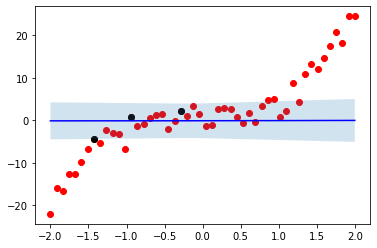

  7%|▋         | 687/10000 [00:05<00:52, 176.16it/s]

Mean loss at epoch 700 : 3.550915241241455
 Validation loss after 700 equals                     2.946927547454834


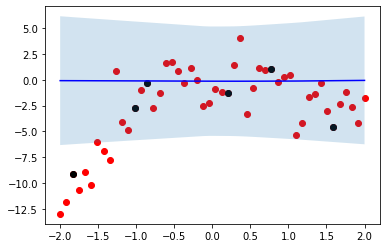

  8%|▊         | 794/10000 [00:05<00:51, 179.21it/s]

Mean loss at epoch 800 : 2.9932122230529785
 Validation loss after 800 equals                     2.7640225887298584


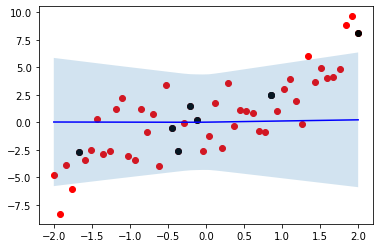

  9%|▉         | 900/10000 [00:06<00:52, 174.49it/s]

Mean loss at epoch 900 : 3.3868298530578613
 Validation loss after 900 equals                     3.6519832611083984


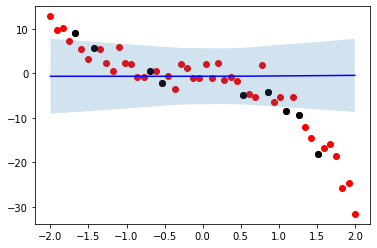

 10%|▉         | 983/10000 [00:07<00:55, 163.14it/s]

Mean loss at epoch 1000 : 3.213183879852295
 Validation loss after 1000 equals                     3.1880035400390625


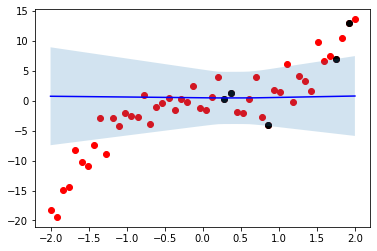

 11%|█         | 1089/10000 [00:07<00:51, 174.45it/s]

Mean loss at epoch 1100 : 2.5436601638793945
 Validation loss after 1100 equals                     3.1298305988311768


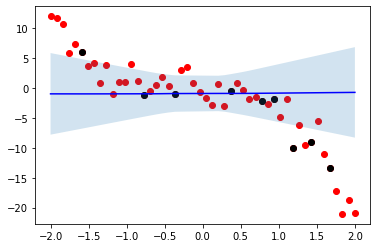

 12%|█▏        | 1198/10000 [00:08<00:49, 178.26it/s]

Mean loss at epoch 1200 : 2.685997724533081
 Validation loss after 1200 equals                     2.9120240211486816


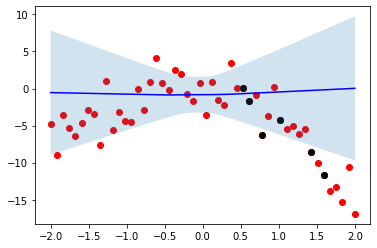

 13%|█▎        | 1297/10000 [00:09<00:53, 163.61it/s]

Mean loss at epoch 1300 : 3.0504422187805176
 Validation loss after 1300 equals                     2.505305528640747


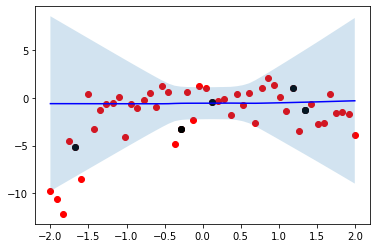

 14%|█▍        | 1389/10000 [00:10<01:00, 142.29it/s]

Mean loss at epoch 1400 : 3.0769362449645996
 Validation loss after 1400 equals                     2.82846736907959


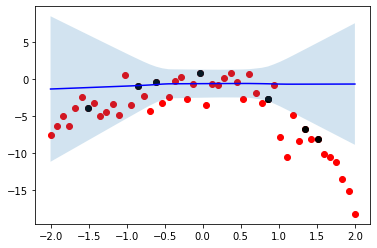

 15%|█▍        | 1490/10000 [00:11<01:08, 124.15it/s]

Mean loss at epoch 1500 : 3.089688301086426
 Validation loss after 1500 equals                     2.6270737648010254


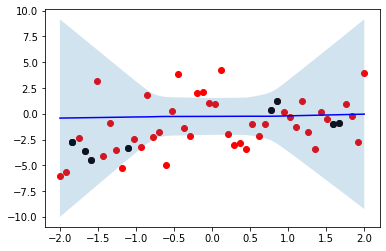

 16%|█▌        | 1586/10000 [00:11<01:05, 129.01it/s]

Mean loss at epoch 1600 : 3.1045825481414795
 Validation loss after 1600 equals                     2.705254554748535


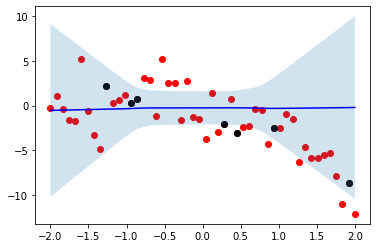

 17%|█▋        | 1698/10000 [00:12<00:53, 155.73it/s]

Mean loss at epoch 1700 : 2.9534802436828613
 Validation loss after 1700 equals                     2.765927791595459


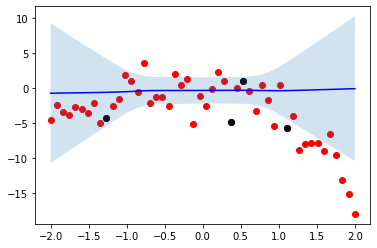

 18%|█▊        | 1797/10000 [00:13<00:51, 160.42it/s]

Mean loss at epoch 1800 : 2.702491044998169
 Validation loss after 1800 equals                     2.914494037628174


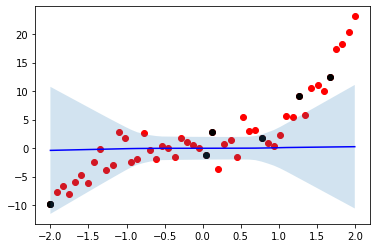

 19%|█▉        | 1882/10000 [00:14<00:58, 137.95it/s]

Mean loss at epoch 1900 : 2.9183030128479004
 Validation loss after 1900 equals                     2.460176467895508


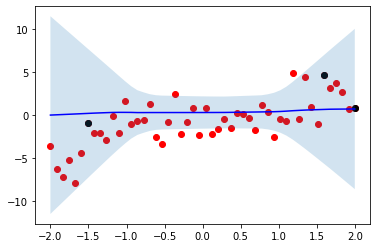

 20%|█▉        | 1983/10000 [00:15<00:50, 160.04it/s]

Mean loss at epoch 2000 : 2.5974130630493164
 Validation loss after 2000 equals                     2.748410224914551


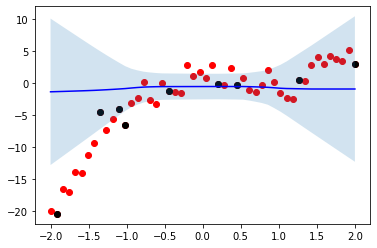

 21%|██        | 2100/10000 [00:15<00:46, 168.49it/s]

Mean loss at epoch 2100 : 2.9732680320739746
 Validation loss after 2100 equals                     2.545576572418213


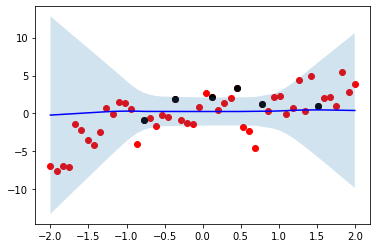

 22%|██▏       | 2180/10000 [00:16<00:50, 153.37it/s]

Mean loss at epoch 2200 : 2.942570686340332
 Validation loss after 2200 equals                     2.6963188648223877


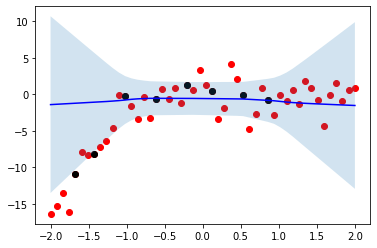

 23%|██▎       | 2287/10000 [00:17<00:51, 149.76it/s]

Mean loss at epoch 2300 : 2.939117193222046
 Validation loss after 2300 equals                     2.5615220069885254


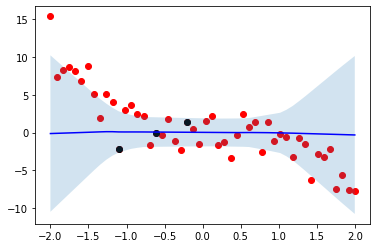

 24%|██▍       | 2389/10000 [00:18<01:00, 126.30it/s]

Mean loss at epoch 2400 : 2.674802541732788
 Validation loss after 2400 equals                     2.847338914871216


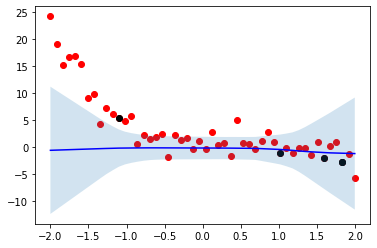

 25%|██▍       | 2492/10000 [00:19<00:59, 126.04it/s]

Mean loss at epoch 2500 : 2.7181200981140137
 Validation loss after 2500 equals                     2.5007483959198


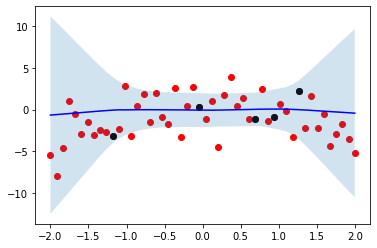

 26%|██▌       | 2591/10000 [00:20<01:11, 103.94it/s]

Mean loss at epoch 2600 : 2.720275640487671
 Validation loss after 2600 equals                     3.2480227947235107


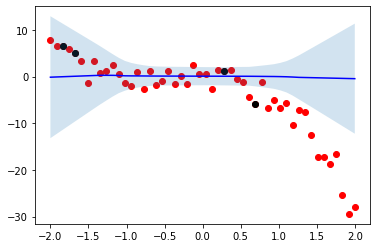

 27%|██▋       | 2689/10000 [00:21<00:52, 138.14it/s]

Mean loss at epoch 2700 : 2.5645382404327393
 Validation loss after 2700 equals                     2.703989267349243


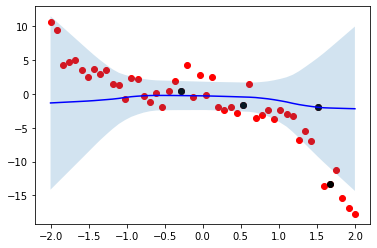

 28%|██▊       | 2783/10000 [00:22<00:47, 151.17it/s]

Mean loss at epoch 2800 : 2.565995693206787
 Validation loss after 2800 equals                     2.4656200408935547


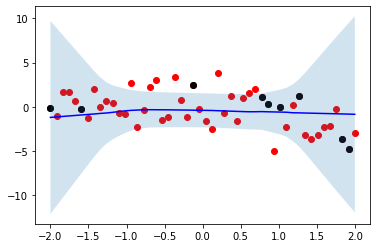

 29%|██▉       | 2896/10000 [00:23<00:46, 151.66it/s]

Mean loss at epoch 2900 : 2.477574110031128
 Validation loss after 2900 equals                     2.440647840499878


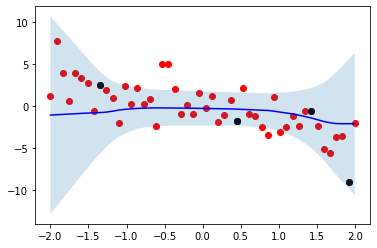

 29%|██▉       | 2938/10000 [00:23<00:57, 123.74it/s]


KeyboardInterrupt: 

In [7]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



## Using different datapoints from the same function

In [8]:
trainer = RegressionTrainer(**default_conf['single_function']['experiment_params'])

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 42.07260513305664
 Validation loss after 0 equals                     25.09590435028076


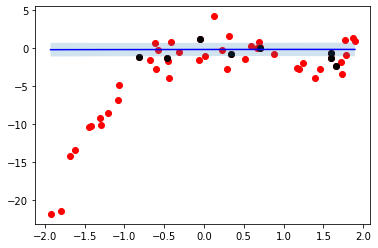

  1%|          | 997/100000 [00:37<48:34, 33.96it/s]  

Mean loss at epoch 1000 : 3.2434024810791016
 Validation loss after 1000 equals                     3.1489497423171997


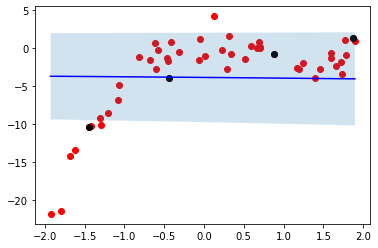

  2%|▏         | 1999/100000 [01:12<45:08, 36.18it/s]  

Mean loss at epoch 2000 : 3.2453818321228027
 Validation loss after 2000 equals                     3.126692056655884


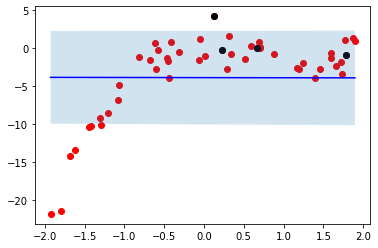

  3%|▎         | 2997/100000 [01:44<1:14:22, 21.74it/s]

Mean loss at epoch 3000 : 3.2412726879119873
 Validation loss after 3000 equals                     3.107571244239807


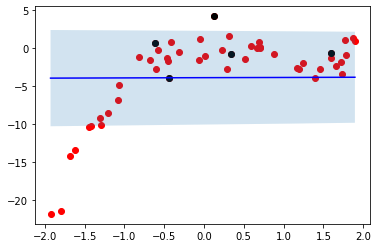

  4%|▍         | 3998/100000 [02:13<45:18, 35.32it/s]  

Mean loss at epoch 4000 : 3.2385406494140625
 Validation loss after 4000 equals                     3.1077094078063965


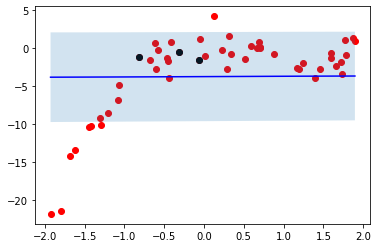

  5%|▍         | 4997/100000 [02:44<49:04, 32.26it/s]  

Mean loss at epoch 5000 : 3.240851402282715
 Validation loss after 5000 equals                     3.1302608251571655


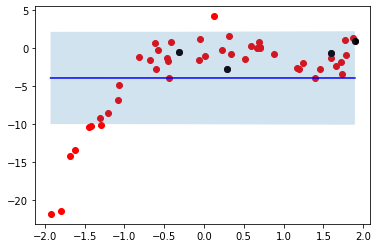

  5%|▌         | 5417/100000 [03:00<52:32, 30.01it/s]  


KeyboardInterrupt: 

In [9]:
model_weights = trainer.run_training(**default_conf['single_function']['training_params'])


In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset = pd.read_csv(
    default_conf['single_function']['training_params']['kwargs']['data_path'])

In [55]:
train, test = train_test_split(dataset,test_size=0.33)
train,test = train.reset_index(drop=True), test.reset_index(drop=True)
idx = np.random.randint(0, len(X_train),50)
X_train, y_train = train['x'][idx], train['target'][idx]
X_test, y_test = test['x'], test['target']

X_train = X_train[:,None]
X_test = X_test[:,None]

In [56]:
model = GaussianProcessRegressor()

In [57]:
model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [58]:
y_pred = model.predict(X_test)

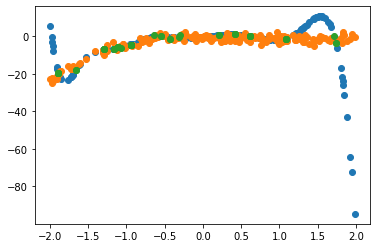

In [59]:
plt.scatter(X_test,y_pred)
plt.scatter(X_test,y_test)
plt.scatter(X_train, y_train)